In [250]:
%matplotlib inline

In [2]:
from astropy.table import Table, vstack, Column
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plotpar = {'axes.labelsize': 17,
           'font.size': 10,
           'legend.fontsize': 17,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False}
plt.rcParams.update(plotpar)
plt.tick_params(direction='in')


In [162]:
df = Table.read('../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot')
df
# df.write('../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot', format = 'votable', overwrite= True)

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0,11.511992980482372,0.21
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,9.602981629485956,0.41
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0,10.609263983929928,0.3
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0,10.635631700426684,0.3
9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,7.93518430860877,0.6
10,476809509515283712,0.18,1.59,0.2,63.07603,64.73018,1.105,Newton17,--,,--,6.8997974,1,82.90278034597667,657.84863,492.7870898317532,-435.8046816667496,12.211264,3.003995,20.027607,0.3189078,1.1049324,0,0,1,0,11.804109136187071,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0,8.04612465461796,0.59


In [8]:
df['Mass'].info()

name = Mass
dtype = float32
unit = solMass
description = Mass of the star (4)
class = MaskedColumn
n_bad = 52
length = 701


In [118]:
Mag_g_array = np.array([5.553, 5.65, 5.83, 6.20, 
                        6.53, 6.83, 7.02, 7.57, 
                        7.74, 8.03, 8.16, 8.44, 
                        8.82, 8.98, 9.29, 9.67, 
                        10.05, 10.87, 11.21, 12.04, 
                        12.45, 13.35, 14.26, 14.40, 
                        14.72, 15.20, 15.20, 15.90, 
                        16.20, 16.40])

Msun_values = np.array([0.88, 0.86, 0.82, 0.78,
                        0.73, 0.70, 0.69,0.64,
                        0.62, 0.59, 0.57, 0.54,
                        0.50, 0.47, 0.44, 0.40, 
                        0.37, 0.27, 0.23, 0.184,
                        0.162, 0.123, 0.102, 0.093,
                        0.090, 0.088, 0.085, 0.080,
                        0.079, 0.078])

#from K0V to M9.5V
# len(Mag_g_array), len(Msun_values), len(abs_mg_scale)

#interpolated function
interp_func = interp1d(Mag_g_array, Msun_values, kind = 'linear', fill_value = None, bounds_error = False)

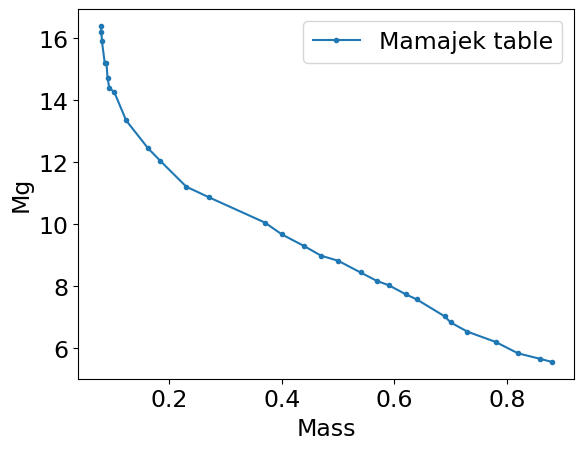

In [120]:
plt.plot(Msun_values, Mag_g_array,'.-', label = 'Mamajek table')
plt.xlabel('Mass')
plt.ylabel('Mg')
plt.legend()

In [122]:
def calc_mass(abs_mg):
   return round(float(interp_func(abs_mg)),2)

In [124]:
check_mass = calc_mass(9.97704446223993)
check_mass

0.38

In [126]:
list = []

for val in np.array(df['abs_Mag']):
    result = calc_mass(val)
    list.append(result)


In [128]:
add_this = Column(data = list, name = 'reMass')
df['reMass'] = list
# df.remove_column('col33')
# df.write('../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot', format = 'votable', overwrite = True)
df

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,col27,col28,col29,col30,col31,abs_Mag,reMass
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,str7,str7,str7,str7,str7,float64,float64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.511992980482372,0.21
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,9.602981629485956,0.41
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.609263983929928,0.3
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.635631700426684,0.3
9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,7.93518430860877,0.6
10,476809509515283712,0.18,1.59,0.2,63.07603,64.73018,1.105,Newton17,--,,--,6.8997974,1,82.90278034597667,657.84863,492.7870898317532,-435.8046816667496,12.211264,3.003995,20.027607,0.3189078,1.1049324,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.804109136187071,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,8.04612465461796,0.59


In [130]:
df['reMass'].info()
mass_clean = [np.nan if val is '--' else val for val in df['reMass']]
tdf = df[np.isnan(mass_clean)]
tdf

name = reMass
dtype = float64
class = Column
n_bad = 43
length = 701


<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_66289/1061646904.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  mass_clean = [np.nan if val is '--' else val for val in df['reMass']]


main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,col27,col28,col29,col30,col31,abs_Mag,reMass
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,str7,str7,str7,str7,str7,float64,float64
15,3409166991697595904,0.27,0.38,0.29,75.77404,21.37606,--,Newton17,--,,--,30.453197,27,--,--,--,--,13.075675,3.221733,39.53035,4.149006,--,0,1,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,--,nan
385,5480104701754400896,--,3.44,--,100.95864,-60.19716,1.4459999799728394,Kounkel,9.138,,--,11.792637,19,2.0838159087785857,9.489822,-3.9609307107763327,8.623674668424618,13.234657,0.8882561,25.166677,19.732182,1.4455972,1,1,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,4.828954034120315,nan
421,5873621042914644352,--,6.89,1.12,226.03846,-63.43586,8.083000183105469,Kounkel,8.83,,--,8.780468,0,2.5980390295259834,25.318548,-18.866000779950113,-16.88498896208604,12.026526,0.88712883,-25.1116,0.6890346,8.083474,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,4.099754806390277,nan
491,5835560352790224896,--,2.91,29.8,239.65671,-58.52804,1.5089999437332153,Kounkel,9.18,,--,27.801727,0,1.135639812350648,12.554145,-7.644719715738583,-9.958153682135691,8.999097,1.7588892,-73.63562,4.741172,1.5086823,1,0,1,1,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,-0.7247000832342181,nan
505,229258520972421376,--,7.26,76.23,65.13249,43.23812,0.9229999780654907,Kounkel,9.173,,--,0.6804335,1,1.863829379711818,7.0474105,3.4456187005937426,-6.1476586200649885,6.4957466,2.0566916,-3.3689337,0.12271812,0.9231613,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,-2.152222621077005,nan
543,2298965529622217088,--,8.13,10.1,314.17805,82.99413,1.0399999618530273,Kounkel,9.367,,--,1.319931,0,2.3409771769567813,3.5017126,2.667142163268738,2.2689962633973693,8.943865,1.2630854,-22.256773,0.18469165,1.0395834,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,0.7908507204948076,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,6346180218430016512,--,5.01,40.87,306.3034,-84.9799,1.059000015258789,Kounkel,9.31,,--,1.1317482,0,0.8733749374212412,10.799589,6.330865326893465,-8.749358493554722,9.303686,1.9931307,13.180369,0.16250552,1.058625,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,-0.9903102323098114,nan


In [132]:
# df.write('../catalogs/Combined/main-after-remove-rvs.vot', format = 'votable', overwrite= True)

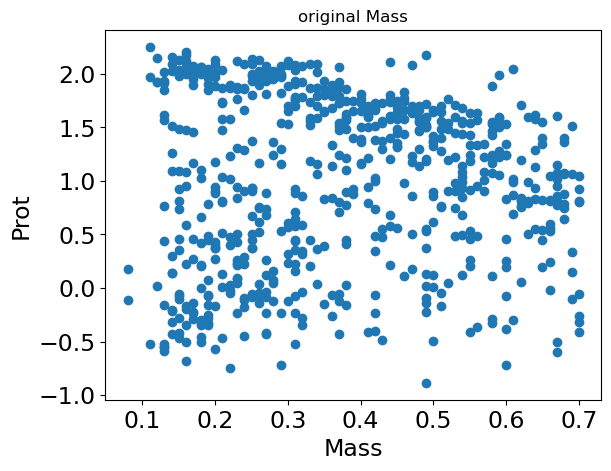

In [134]:
plt.scatter(df['Mass'], np.log10(df['Per']))

plt.xlabel('Mass')
plt.ylabel('Prot')
plt.title('original Mass')
plt.show()

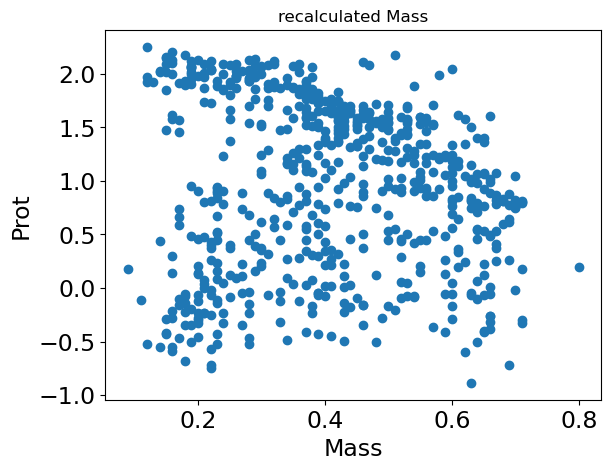

In [136]:
plt.scatter(df['reMass'], np.log10(df['Per']))

plt.xlabel('Mass')
plt.ylabel('Prot')
plt.title('recalculated Mass')
plt.show()

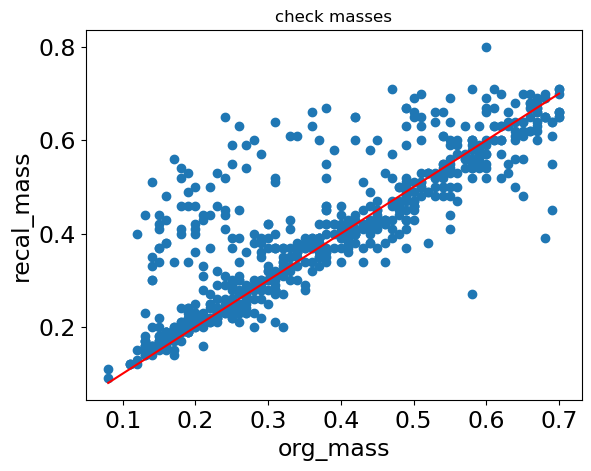

In [138]:
#check cross_Match
plt.scatter(df['Mass'], df['reMass'])

#one to one line
max_val = max(df['Mass'].max(), df['reMass'].max())
min_val = min(df['Mass'].min(), df['reMass'].min())
plt.plot([min_val, max_val], [min_val, max_val], color = 'red', label='One-to-one line')

plt.xlabel('org_mass')
plt.ylabel('recal_mass')
plt.title('check masses')
plt.show()

In [140]:
mass_table = Table.read('../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot')
mass_table

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,col27,col28,col29,col30,col31,abs_Mag,reMass
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,str7,str7,str7,str7,str7,float64,float64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.511992980482372,0.21
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,9.602981629485956,0.41
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.609263983929928,0.3
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.635631700426684,0.3
9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,7.93518430860877,0.6
10,476809509515283712,0.18,1.59,0.2,63.07603,64.73018,1.105,Newton17,--,,--,6.8997974,1,82.90278034597667,657.84863,492.7870898317532,-435.8046816667496,12.211264,3.003995,20.027607,0.3189078,1.1049324,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.804109136187071,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,8.04612465461796,0.59


In [142]:
mass_table['rv_amplitude_robust'].info()

name = rv_amplitude_robust
dtype = float32
unit = km / s
description = Total amplitude in the radial velocity time series after outlier
     removal
class = MaskedColumn
n_bad = 0
length = 701


In [154]:
list = ['Newton17', 'Wright', 'Kounkel']
mass_table['reference'] = ['Shan' if val not in list else val for val in mass_table['reference']]
# mass_table.write('../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot', format = 'votable', overwrite= True)

In [64]:
shan_count = sum(mass_table['reference'] == 'Shan')
shan_count

232

In [146]:
mask_newton = mass_table['reference'] == 'Newton17'
mask_wright = mass_table['reference'] == 'Wright'
mask_shan = mass_table['reference'] == 'Shan'
mask_kounkel = mass_table['reference'] == 'Kounkel'


/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_66289/3123630444.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(mass_table['reMass'][list[i]], np.log10(mass_table['Per'][list[i]]), cmap = mass_table['reMass'][list[i]], label = labels[i])


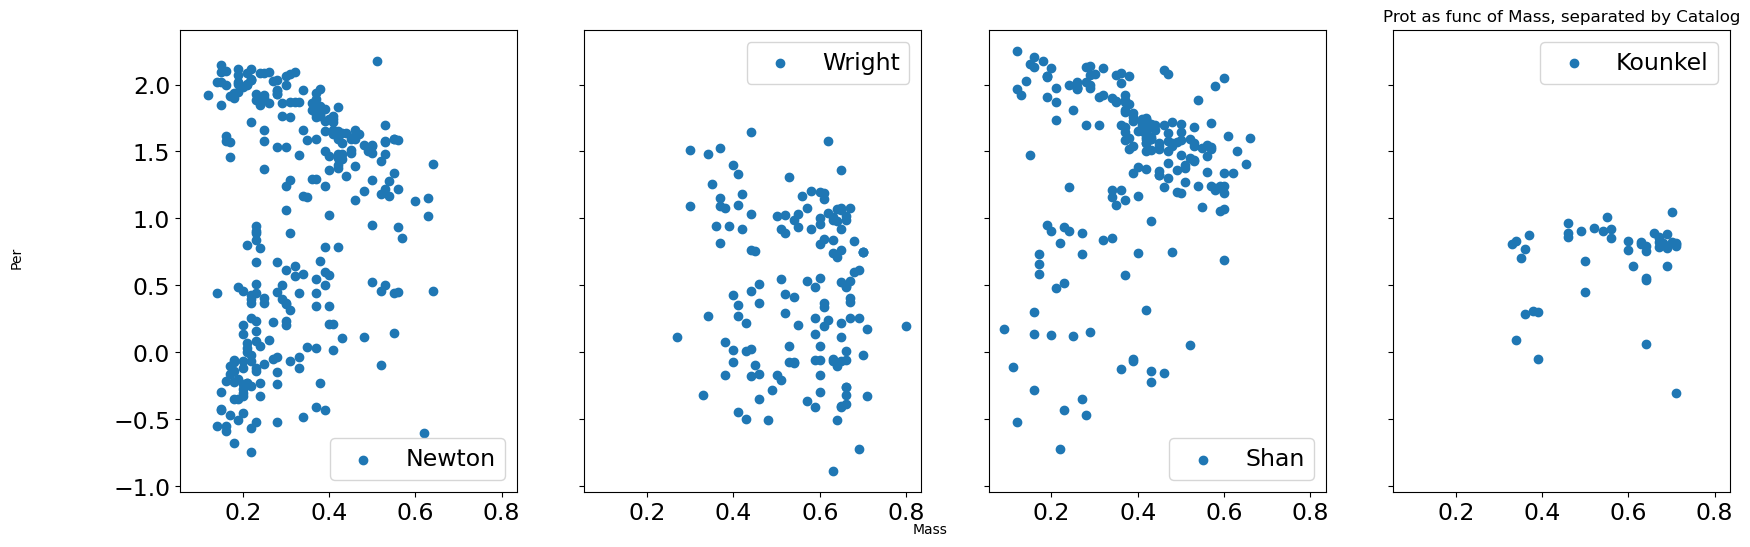

In [148]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20,6))

fig.text(0.5, 0.04, 'Mass', ha='center')
fig.text(0.04, 0.5, 'Per', va='center', rotation='vertical')
list = [mask_newton, mask_wright, mask_shan, mask_kounkel]
labels = ['Newton', 'Wright', 'Shan', 'Kounkel']

for i in range(len(list)):
    axs[i].scatter(mass_table['reMass'][list[i]], np.log10(mass_table['Per'][list[i]]), cmap = mass_table['reMass'][list[i]], label = labels[i])
    axs[i].legend()

plt.title('Prot as func of Mass, separated by Catalog')
plt.show()

/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_66289/499566801.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[i].scatter(mass_table['Mass'][list[i]], mass_table['reMass'][list[i]], cmap = mass_table['reMass'][list[i]], label = labels[i])


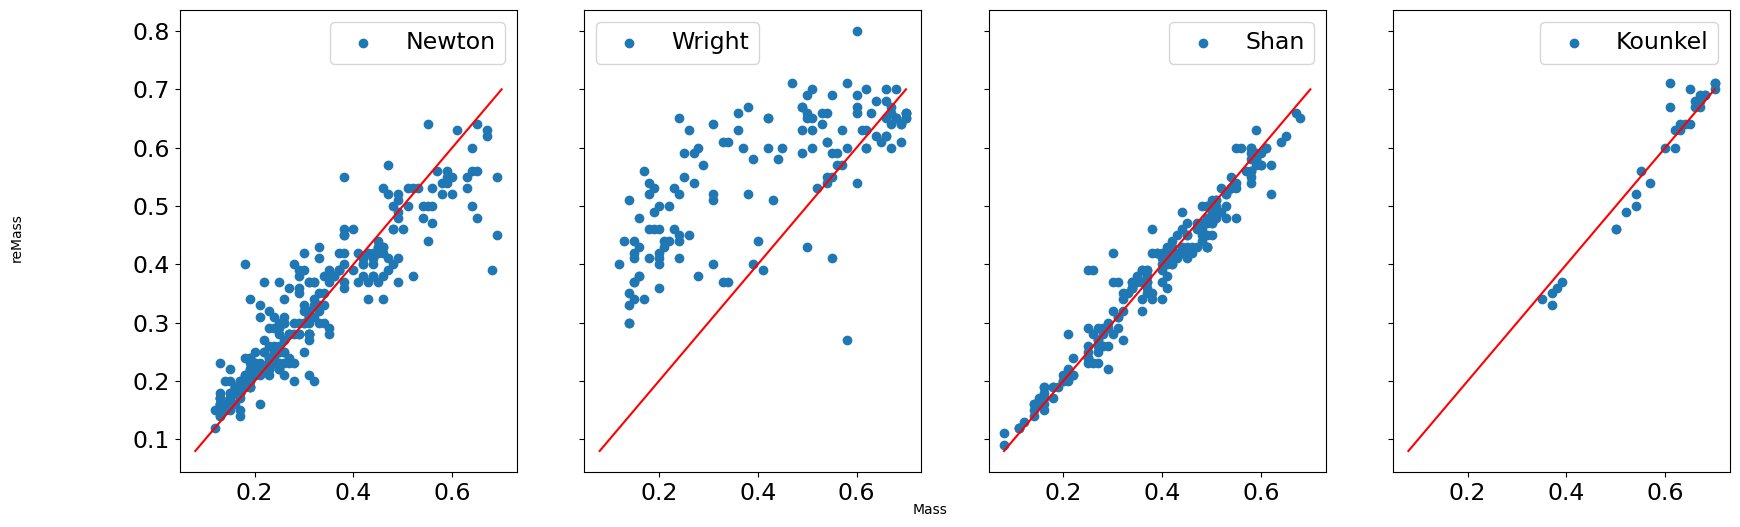

In [152]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20,6))

fig.text(0.5, 0.04, 'Mass', ha='center')
fig.text(0.04, 0.5, 'reMass', va='center', rotation='vertical')

list = [mask_newton, mask_wright, mask_shan, mask_kounkel]
labels = ['Newton', 'Wright', 'Shan', 'Kounkel']

max_val = max(df['Mass'].max(), df['reMass'].max())
min_val = min(df['Mass'].min(), df['reMass'].min())

for i  in range(len(list)):
    axs[i].plot([min_val, max_val], [min_val, max_val], color = 'red')
    axs[i].scatter(mass_table['Mass'][list[i]], mass_table['reMass'][list[i]], cmap = mass_table['reMass'][list[i]], label = labels[i])
    axs[i].legend()
plt.show()